importing libraries

In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')


loading and reading the data

In [94]:
df = pd.read_csv('TSLA.csv')
df.head(10)


,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.00,25.00,17.54,23.89,23.89,18766300
1,2010-06-30,25.79,30.42,23.30,23.83,23.83,17187100
2,2010-07-01,25.00,25.92,20.27,21.96,21.96,8218800
3,2010-07-02,23.00,23.10,18.71,19.20,19.20,5139800
4,2010-07-06,20.00,20.00,15.83,16.11,16.11,6866900
5,2010-07-07,16.40,16.63,14.98,15.80,15.80,6921700
6,2010-07-08,16.14,17.52,15.57,17.46,17.46,7711400
7,2010-07-09,17.58,17.90,16.55,17.40,17.40,4050600
8,2010-07-12,17.95,18.07,17.00,17.05,17.05,2202500
9,2010-07-13,17.39,18.64,16.90,18.14,18.14,2680100


Explanatory data analysis

In [95]:
#printing the dataset number of rows and columns respectively(shape)
df.shape


(2416, 7)

In [96]:
#to obtain dataset summary statistics
df.describe()


,Open,High,Low,Close,Adj Close,Volume
count,2416.00,2416.00,2416.00,2416.00,2416.00,2416.00
mean,186.27,189.58,182.92,186.40,186.40,5572721.69
std,118.74,120.89,116.86,119.14,119.14,4987809.15
min,16.14,16.63,14.98,15.80,15.80,118500.00
25%,34.34,34.90,33.59,34.40,34.40,1899275.00
50%,213.04,216.75,208.87,212.96,212.96,4578400.00
75%,266.45,270.93,262.10,266.77,266.77,7361150.00
max,673.69,786.14,673.52,780.00,780.00,47065000.00


In [97]:
#to obtain dataset information
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2416 entries, 0 to 2415
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2416 non-null   object 
 1   Open       2416 non-null   float64
 2   High       2416 non-null   float64
 3   Low        2416 non-null   float64
 4   Close      2416 non-null   float64
 5   Adj Close  2416 non-null   float64
 6   Volume     2416 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 132.2+ KB


In [99]:
#verying the dataset by printing the first five columns
df.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.00,25.00,17.54,23.89,23.89,18766300
1,2010-06-30,25.79,30.42,23.30,23.83,23.83,17187100
2,2010-07-01,25.00,25.92,20.27,21.96,21.96,8218800
3,2010-07-02,23.00,23.10,18.71,19.20,19.20,5139800
4,2010-07-06,20.00,20.00,15.83,16.11,16.11,6866900


In [100]:
df[df['Close'] == df['Adj Close']].shape


(2416, 7)

In [101]:
#checking null values
df.isnull().sum()


Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [102]:
#To view the correlation matrix of the dataset
df.corr()

,Open,High,Low,Close,Adj Close,Volume
Open,1.00,1.00,1.00,1.00,1.00,0.50
High,1.00,1.00,1.00,1.00,1.00,0.51
Low,1.00,1.00,1.00,1.00,1.00,0.49
Close,1.00,1.00,1.00,1.00,1.00,0.51
Adj Close,1.00,1.00,1.00,1.00,1.00,0.51
Volume,0.50,0.51,0.49,0.51,0.51,1.00


In [142]:
features = ['Open', 'High', 'Low', 'Close', 'Volume']


In [105]:
df['Date'] = pd.to_datetime(df['Date'])

In [106]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

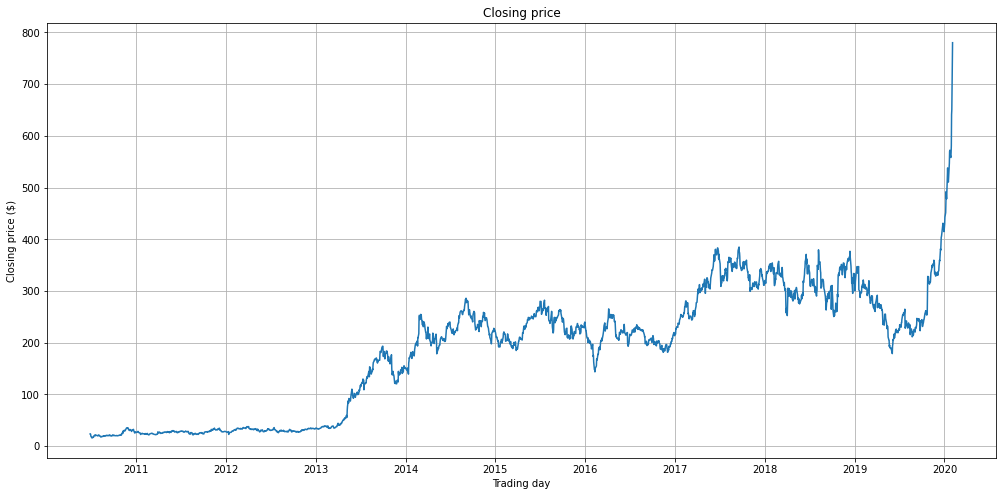

In [110]:
#ploting the closing price
plt.figure(figsize=(17, 8))
plt.plot(df.Date, df.Close)
plt.title('Closing price')
plt.ylabel('Closing price ($)')
plt.xlabel('Trading day')
plt.grid(True)
plt.show()

In [111]:
from scipy import stats

# Remove the variables 
Descriptive_Statistics = df.describe()
Descriptive_Statistics = Descriptive_Statistics.T # Convert into a dataframe

# Extract the IQR values 
Descriptive_Statistics['IQR'] = Descriptive_Statistics['75%'] - Descriptive_Statistics['25%']

# In this scenario, the outliers are removed using Z-Score due to the variability in historical data
df = df[(np.abs(stats.zscore(df[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']])) < 3).all(axis = 1)] # abs for (+/-) 3-sigma
df = df.reset_index() # Due to elimination of rows, index has to be reset

In [114]:
print(df)

      index       Date   Open   High    Low  Close  Adj Close    Volume
0         0 2010-06-29  19.00  25.00  17.54  23.89      23.89  18766300
1         1 2010-06-30  25.79  30.42  23.30  23.83      23.83  17187100
2         2 2010-07-01  25.00  25.92  20.27  21.96      21.96   8218800
3         3 2010-07-02  23.00  23.10  18.71  19.20      19.20   5139800
4         4 2010-07-06  20.00  20.00  15.83  16.11      16.11   6866900
...     ...        ...    ...    ...    ...    ...        ...       ...
2354   2396 2020-01-06 440.47 451.56 440.00 451.54     451.54  10133000
2355   2397 2020-01-07 461.40 471.63 453.36 469.06     469.06  17882100
2356   2400 2020-01-10 481.79 484.94 473.70 478.15     478.15  12959500
2357   2403 2020-01-15 529.76 537.84 516.79 518.50     518.50  17368800
2358   2405 2020-01-17 507.61 515.67 503.16 510.50     510.50  13629100

[2359 rows x 8 columns]


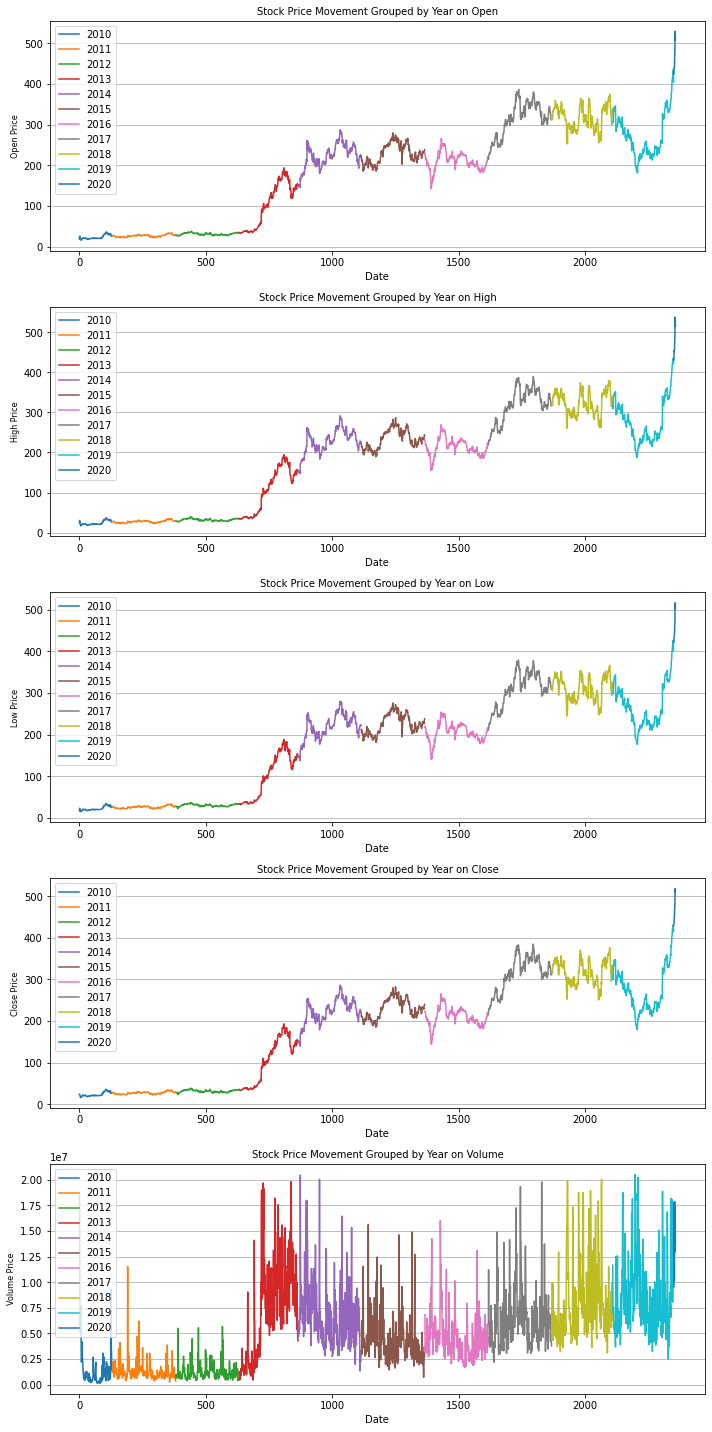

In [115]:
# Since the data is a time series data, we should be able to predict the future through forecasting techniques

# Delete the index column due to reset
# del data['index']

# Decompose the time series year-wise and month-wise to analyse further
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['WeekDay'] = df['Date'].dt.weekday

# Firstly, plot the data year-wise to see the duration of when it hiked and dipped
fig, ax = plt.subplots(len(Column_List), figsize = (10, 20))

# Group the data by year and plot
for i, col_list in enumerate(Column_List):
    df.groupby('Year')[col_list].plot(ax = ax[i], legend = True)
    ax[i].set_title("Stock Price Movement Grouped by Year on" + " " + col_list, fontsize = 10)
    ax[i].set_ylabel(col_list + " " + "Price", fontsize = 8)
    ax[i].set_xlabel('Date')
    fig.tight_layout(pad = 1.1)
    ax[i].yaxis.grid(True) # To enable grid only on the Y-axis

In [122]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [123]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_df = scaler.fit_transform(df['Open'].values.reshape(-1,1))

In [127]:
prediction_days = 100

x_train = []
y_train = []

for x in range(prediction_days, len(scaled_df)):
    x_train.append(scaled_df[x - prediction_days:x, 0])
    y_train.append(scaled_df[x, 0])
    
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [128]:
print(x_train.shape)
print(y_train.shape)

(2259, 100, 1)
(2259,)


In [129]:
def LSTM_model():
    
    model = Sequential()    
    model.add(LSTM(units = 50, return_sequences = True, input_shape = (x_train.shape[1],1)))
    model.add(Dropout(0.2))
    model.add(LSTM(units = 50, return_sequences = True))
    model.add(Dropout(0.2))
    model.add(LSTM(units = 50))
    model.add(Dropout(0.2))
    model.add(Dense(units=1))
    
    return model

In [130]:
model = LSTM_model()
model.summary()
model.compile(optimizer='adam', loss='mean_squared_error')

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 dropout_1 (Dropout)         (None, 100, 50)           0         
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dropout_2 (Dropout)         (None, 50)                0         
                                                                 
 dense (Dense)               (None, 1)                

In [131]:
checkpointer = ModelCheckpoint(filepath = 'weights_best.hdf5', verbose = 1, save_best_only = True)
model.fit(x_train, y_train, epochs=10, batch_size = 32,callbacks = [checkpointer])

Epoch 1/10
71/71 [==============================] - ETA: 0s - loss: 0.0150

71/71 [==============================] - 16s 153ms/step - loss: 0.0150
Epoch 2/10
71/71 [==============================] - ETA: 0s - loss: 0.0028

71/71 [==============================] - 9s 130ms/step - loss: 0.0028
Epoch 3/10
71/71 [==============================] - ETA: 0s - loss: 0.0029

71/71 [==============================] - 10s 142ms/step - loss: 0.0029
Epoch 4/10
71/71 [==============================] - ETA: 0s - loss: 0.0026

71/71 [==============================] - 9s 126ms/step - loss: 0.0026
Epoch 5/10
71/71 [==============================] - ETA: 0s - loss: 0.0027

71/71 [==============================] - 12s 173ms/step - loss: 0.0027
Epoch 6/10
71/71 [==============================] - ETA: 0s - loss: 0.0022

71/71 [==============================] - 13s 178ms/step - loss: 0.0022
Epoch 7/10
71/71 [==============================] - ETA: 0s - loss: 0.0021

71/71 [==============================] - 9s 129ms/step - loss: 0.0021
Epoch 8/10
71/71 [==============================] - ETA: 0s - loss: 0.0022

71/71 [==============================] - 12s 166ms/step - loss: 0.0022
Epoch 9/10
71/71 [==============================] - ETA: 0s - loss: 0.0019

71/71 [==============================] - 11s 143ms/step - loss: 0.0019
Epoch 10/10
71/71 [==============================] - ETA: 0s - loss: 0.0018

71/71 [==============================] - 9s 127ms/step - loss: 0.0018


In [135]:
n=len(df)

In [136]:
test_df=df[(n//10)*9:]

In [137]:
#model for calculating acrual and predicted prices]
actual_prices = test_df['Open'].values
total_dataset = pd.concat((df['Open'], test_df['Open']), axis=0)

model_inputs = total_dataset[len(total_dataset)-len(test_df)-prediction_days:].values
model_inputs = model_inputs.reshape(-1,1)
model_inputs = scaler.transform(model_inputs)

In [138]:
x_test = []
for x in range(prediction_days,len(model_inputs)):
    x_test.append(model_inputs[x-prediction_days:x,0])

x_test = np.array(x_test)
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

predicted_prices = model.predict(x_test)
predicted_prices = scaler.inverse_transform(predicted_prices)

8/8 [==============================] - 1s 32ms/step


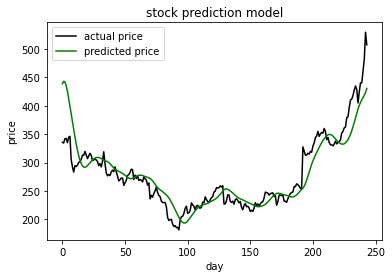

In [143]:
#to graph the actual and predicted prices
plt.plot(actual_prices, color='black', label=f"actual price")
plt.plot(predicted_prices, color= 'green', label=f"predicted price")
plt.title(f"stock prediction model")
plt.xlabel("day")
plt.ylabel(f"price")
plt.legend()
plt.show()

In [140]:
real_data = [model_inputs[len(model_inputs)+1-prediction_days:len(model_inputs+1),0]]
real_data = np.array(real_data)
real_data = np.reshape(real_data,(real_data.shape[0],real_data.shape[1],1))
print(real_data.shape)

(1, 99, 1)


In [141]:
prediction = model.predict(real_data)
prediction = scaler.inverse_transform(prediction)
print(f"prediction: {prediction}")

1/1 [==============================] - 1s 1s/step
prediction: [[438.89136]]
